### Importing libraries and data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Importing cleaned data
path = r'/Users/jennyfevik/Desktop/Data'

In [3]:
df_border = pd.read_csv(os.path.join(path, 'Prepared', 'Border_Choropleth.csv'),index_col=0)

### Prepping for regression model

In [4]:
df_border.head()

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year,Count Category,State Total
0,Del Rio,Texas,US-Mexico Border,Trucks,5823,29.327,-100.928,Feb,2023,Low Crossings,4076706895
2,Skagway,Alaska,US-Canada Border,Pedestrians,1,59.630,-135.164,Feb,2023,Low Crossings,15399123
3,Brownsville,Texas,US-Mexico Border,Trains,70,25.952,-97.401,Feb,2023,Low Crossings,4076706895
4,Sault Sainte Marie,Michigan,US-Canada Border,Truck Containers Loaded,2322,46.509,-84.361,Feb,2023,Low Crossings,812680737
5,Lukeville,Arizona,US-Mexico Border,Pedestrians,6383,31.880,-112.817,Feb,2023,Low Crossings,1008310869


In [5]:
# adding Month date codes
enc = OrdinalEncoder(categories=[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])

In [6]:
encoded_month = enc.fit_transform(df_border[['Month']])

In [7]:
df_border['Month Code'] = encoded_month

In [8]:
df_border.head()

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year,Count Category,State Total,Month Code
0,Del Rio,Texas,US-Mexico Border,Trucks,5823,29.327,-100.928,Feb,2023,Low Crossings,4076706895,1.0
2,Skagway,Alaska,US-Canada Border,Pedestrians,1,59.630,-135.164,Feb,2023,Low Crossings,15399123,1.0
3,Brownsville,Texas,US-Mexico Border,Trains,70,25.952,-97.401,Feb,2023,Low Crossings,4076706895,1.0
4,Sault Sainte Marie,Michigan,US-Canada Border,Truck Containers Loaded,2322,46.509,-84.361,Feb,2023,Low Crossings,812680737,1.0
5,Lukeville,Arizona,US-Mexico Border,Pedestrians,6383,31.880,-112.817,Feb,2023,Low Crossings,1008310869,1.0


In [9]:
# creating new columns for month total counts
df_border['Month Total']=df_border.groupby(['Month'])['Count of Crossing'].transform(np.sum)

In [10]:
df_border.head()

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year,Count Category,State Total,Month Code,Month Total
0,Del Rio,Texas,US-Mexico Border,Trucks,5823,29.327,-100.928,Feb,2023,Low Crossings,4076706895,1.0,822883011
2,Skagway,Alaska,US-Canada Border,Pedestrians,1,59.630,-135.164,Feb,2023,Low Crossings,15399123,1.0,822883011
3,Brownsville,Texas,US-Mexico Border,Trains,70,25.952,-97.401,Feb,2023,Low Crossings,4076706895,1.0,822883011
4,Sault Sainte Marie,Michigan,US-Canada Border,Truck Containers Loaded,2322,46.509,-84.361,Feb,2023,Low Crossings,812680737,1.0,822883011
5,Lukeville,Arizona,US-Mexico Border,Pedestrians,6383,31.880,-112.817,Feb,2023,Low Crossings,1008310869,1.0,822883011


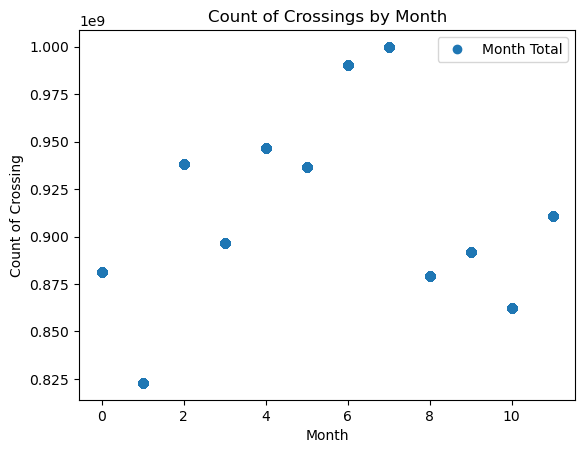

In [21]:
# scatterplot using matplotlib

df_border.plot(x = 'Month Code', y='Month Total',style='o')
plt.title('Count of Crossings by Month')  
plt.xlabel('Month')  
plt.ylabel('Count of Crossing')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_border['Month Code'].values.reshape(-1,1)
y = df_border['Month Total'].values.reshape(-1,1)

In [23]:
X

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [10.],
       [ 2.],
       [ 6.]])

In [24]:
y

array([[822883011],
       [822883011],
       [822883011],
       ...,
       [862598841],
       [938287436],
       [990377568]])

In [25]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [26]:
# Creating a regression object.
regression = LinearRegression() 

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

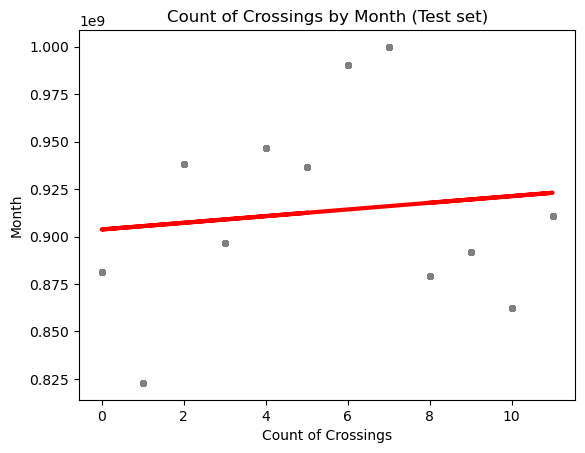

In [29]:
# Regression plot on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Count of Crossings by Month (Test set)')
plot_test.xlabel('Count of Crossings')
plot_test.ylabel('Month')
plot_test.show()

The regression line does not fit the test set and seems to be unable to predict this data.

In [21]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
# Printing model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1757338.03690821]]
Mean squared error:  2402316374651759.0
R2 score:  0.01481122789300382


In [23]:
y_predicted

array([[9.17764689e+08],
       [9.21279366e+08],
       [9.07220661e+08],
       ...,
       [9.21279366e+08],
       [9.21279366e+08],
       [9.12492675e+08]])

In [24]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,879095640,9.177647e+08
1,862598841,9.212794e+08
2,938287436,9.072207e+08
3,862598841,9.212794e+08
4,936734324,9.124927e+08
5,946530098,9.107353e+08
6,822883011,9.054633e+08
7,990377568,9.142500e+08
8,999866076,9.160074e+08
9,990377568,9.142500e+08


### Comparing how the regression fits the training set

In [25]:
# Prediction
y_predicted_train = regression.predict(X_train)

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1757338.03690821]]
Mean squared error:  2410110710246235.5
R2 score:  0.014878549599626534


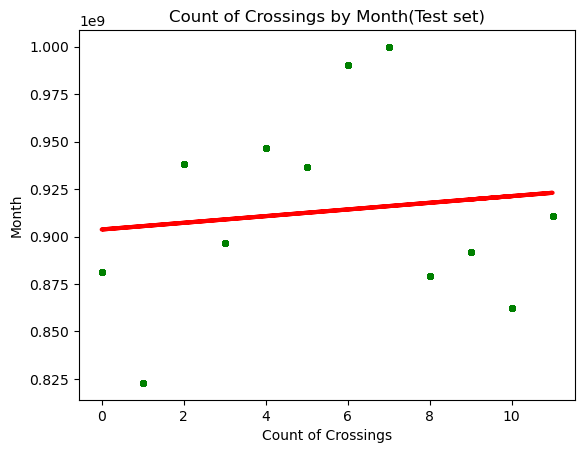

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Count of Crossings by Month(Test set)')
plot_test.xlabel('Count of Crossings')
plot_test.ylabel('Month')
plot_test.show()

The regression model was unable to predict the monthly crossings, likely due to the lack of patterns shown in the scatterplot. It is possible that separating out the data by Canadian border and Mexican border may show more of a patterns in monthly border crossings. 

In [30]:
df_border.groupby(['Border','Month']).sum()['Count of Crossing']

/var/folders/z2/0zshgjn917v11pctr85j0spw0000gn/T/ipykernel_72618/3518388024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_border.groupby(['Border','Month']).sum()['Count of Crossing']


Border            Month
US-Canada Border  Apr      222776344
                  Aug      327043359
                  Dec      207173948
                  Feb      191273992
                  Jan      195814983
                  Jul      315644207
                  Jun      268880163
                  Mar      224445882
                  May      253275775
                  Nov      211066520
                  Oct      237063590
                  Sep      251724194
US-Mexico Border  Apr      673924213
                  Aug      672822717
                  Dec      703543951
                  Feb      631609019
                  Jan      685533517
                  Jul      674733361
                  Jun      667854161
                  Mar      713841554
                  May      693254323
                  Nov      651532321
                  Oct      654734971
                  Sep      627371446
Name: Count of Crossing, dtype: int64

In [32]:
# exporting data
df_border.to_csv(os.path.join(path, 'Prepared', 'Border_Regression.csv'))